## 6. Feladatsor

Hill-cipher

#### 0. Feladat:

Csodáljuk meg a *.ppm* képformátum szépségeit.

In [1]:
txt = fileread("data/6-the-letter-s.ppm")

txt = P1
# This is an example bitmap of the letter "S"
6 10
0 0 0 0 0 0
0 0 1 1 1 0
0 1 0 0 0 0
0 1 0 0 0 0
0 0 1 1 0 0
0 0 0 0 1 0
0 0 0 0 1 0
0 1 1 1 0 0
0 0 0 0 0 0
0 0 0 0 0 0



In [2]:
A = imread("data/6-the-letter-s.ppm")

A =

  1  1  1  1  1  1
  1  1  0  0  0  1
  1  0  1  1  1  1
  1  0  1  1  1  1
  1  1  0  0  1  1
  1  1  1  1  0  1
  1  1  1  1  0  1
  1  0  0  0  1  1
  1  1  1  1  1  1
  1  1  1  1  1  1



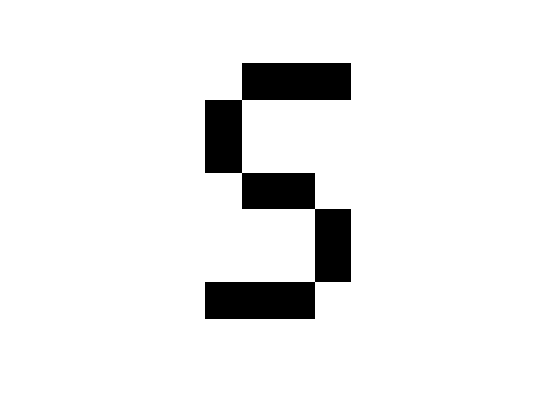

In [3]:
imshow(A)

#### 1. Feladat:

Implementáljuk a <a href='https://en.wikipedia.org/wiki/Hill_cipher'>*Hill cipher*</a>-t. Titkosítsuk ezzel a fenti képet. Az adódó képet mentsük el *.ppm* formátumban.

In [4]:
M = [0, 1;
     1, 0]

M =

   0   1
   1   0



In [5]:
numel(A)

[M * A(:)(1:2), M * A(:)(3:4)]

M * V 

ans =  60
ans =

   1   1
   1   1

error: 'V' undefined near line 1 column 5


In [6]:
reshape(A, [2 numel(A)/2])

ans =

 Columns 1 through 26:

  1  1  1  1  1  1  0  1  1  1  1  1  0  1  1  1  1  0  1  1  1  1  1  0  1  1
  1  1  1  1  1  1  0  1  0  1  0  1  1  0  1  0  1  1  0  1  0  1  0  1  1  1

 Columns 27 through 30:

  1  1  1  1
  1  1  1  1



In [7]:
M * reshape(A, [2 numel(A)/2])

ans =

 Columns 1 through 20:

   1   1   1   1   1   1   0   1   0   1   0   1   1   0   1   0   1   1   0   1
   1   1   1   1   1   1   0   1   1   1   1   1   0   1   1   1   1   0   1   1

 Columns 21 through 30:

   0   1   0   1   1   1   1   1   1   1
   1   1   1   0   1   1   1   1   1   1



In [8]:
A

A =

  1  1  1  1  1  1
  1  1  0  0  0  1
  1  0  1  1  1  1
  1  0  1  1  1  1
  1  1  0  0  1  1
  1  1  1  1  0  1
  1  1  1  1  0  1
  1  0  0  0  1  1
  1  1  1  1  1  1
  1  1  1  1  1  1



In [9]:
reshape(mod(M * reshape(A, [2 numel(A)/2]), 2), size(A))

ans =

   1   1   0   0   0   1
   1   1   1   1   1   1
   1   0   1   1   1   1
   1   0   1   1   1   1
   1   1   1   1   0   1
   1   1   0   0   1   1
   1   0   0   0   1   1
   1   1   1   1   0   1
   1   1   1   1   1   1
   1   1   1   1   1   1



In [10]:
M = randi(5, 3, 3) - 1

M =

   0   1   3
   0   1   4
   1   1   4



In [11]:
mod(det(M), 5)

ans =  1


In [12]:
function M = gen_invertible_mtx()
    detM = 0;
    
    while detM == 0
        M = randi(5, 3, 3) - 1;
        detM = mod(det(M), 5);
    end
end

In [13]:
M = gen_invertible_mtx()

M =

   3   1   4
   3   4   0
   4   1   2



In [14]:
function M = gen_invertible_mtx_mod_m(m, num_rows)
    gcdDetM = 0;
    
    while gcdDetM != 1
        M = randi(m, num_rows) - 1;
        gcdDetM = gcd(round(det(M)), m);
    end
end

In [15]:
gen_invertible_mtx_mod_m(10, 3)

ans =

   6   7   0
   1   2   8
   1   5   9



In [16]:
function r = inverse_mod_m(x, m)
    [g, c] = gcd(x, m);
    
    r = mod(c, m);
end

assert([1 3 2 4], arrayfun(@(x)(inverse_mod_m(x, 5)), (1:5-1)))

In [ ]:
function B = matrix_inverse_mod_m(A, m)
    % adjoint from Symbolic Math Toolbox
    B = inverse_mod_m(det(A), m) * adjoint(A);
end

matrix_inverse_mod_m([0 1; 1 0], 2)

#### 2. Feladat:

Alkalmazzuk a fenti eljárást (angol, kisbetűs) szöveg titkosítására. A véletlenszerűen generált mátrixunk legyen egy permutációs mátrix.